3.2.2 계단함수 구현

In [ ]:
# 인수를 실수만 받음
def step_function(x):
    if x>0: return 1
    else: return 0

In [2]:
import numpy as np

In [3]:
# 인수로 배열을 받음
def step_function(x):
    y = x>0  # y는 boolean 배열
    
    # y에서 False를 0, True를 1로 변환
    # y.astype(np.int)를 쓰면 warning 발생(np.int는 int와 완전히 같음)
    return y.astype(int) # or y.astype(np.int64)

In [4]:
step_function(np.array([-1,0.5,3]))

array([0, 1, 1])

In [5]:
import matplotlib.pylab as plt

In [6]:
# 위의 함수를 더 간단히
def step_function(x):
    return np.array(x>0, dtype=int)

3.2.3 계단함수의 그래프

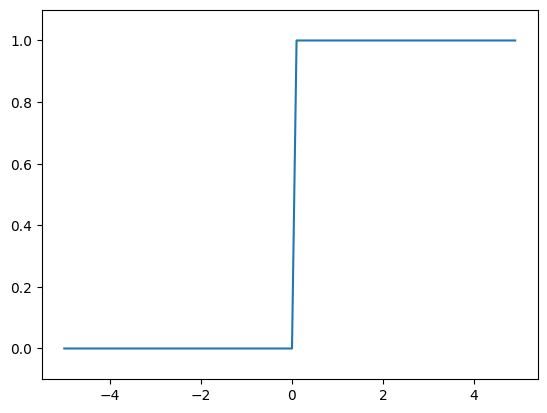

In [7]:
x = np.arange(-5.0, 5.0, 0.1)  # x는 [-5, -4.9, ..., 4.9] 인 numpy array
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)  # y축의 범위 
plt.show()

# plot은 이웃한 점들을 모두 이어서 출력
# 그래서 (0,0) 과 (0,1)이 이어진 것 처럼 보임
# 하지만 실제 함수는 불연속 

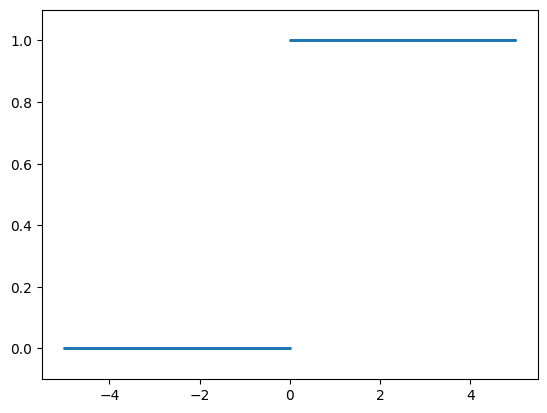

In [8]:
# 선으로 잇지 않고 출력 
x = np.arange(-5.0, 5.0, 0.01)  # x는 [-5, -4.9, ..., 4.9] 인 numpy array
y = step_function(x)
plt.plot(x,y, 'o', markersize=1)
plt.ylim(-0.1,1.1)  # y축의 범위 
plt.show()


3.2.4 시그모이드 함수 구현하기

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
sigmoid(np.array([-1,1,2]))

array([0.26894142, 0.73105858, 0.88079708])

In [11]:
sigmoid(1)

0.7310585786300049

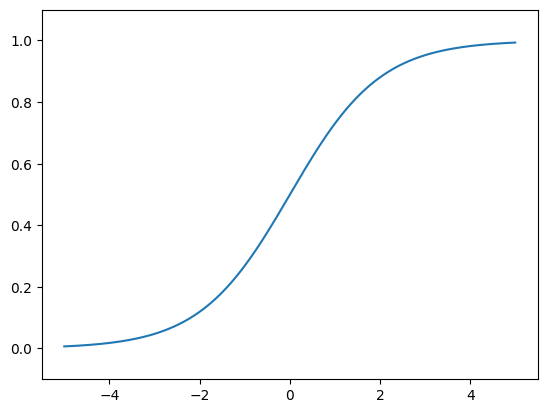

In [12]:
x = np.arange(-5,5,0.01)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

3.2.7 ReLU 함수

In [13]:
def relu(x):
    return np.maximum(0,x)

In [14]:
relu(np.array([-.3,0.5, 1]))

array([0. , 0.5, 1. ])

In [15]:
relu(3)

3

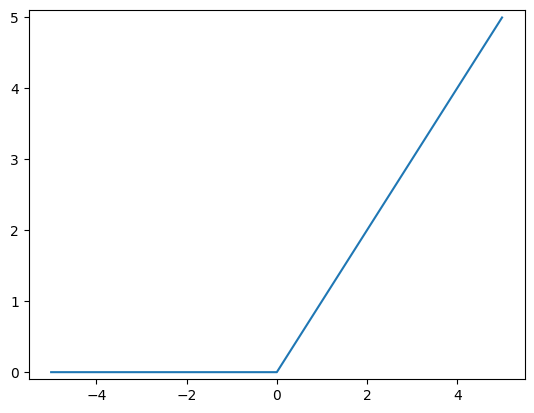

In [16]:
x = np.arange(-5,5,0.01)
y = relu(x)
plt.plot(x,y)
plt.ylim(-0.1,5.1)
plt.show()

3.3.1 다차원 배열

In [17]:
# 1차원 배열
A = np.array([1,2,3,4])
print("A:",A)
print("dim of A:",np.ndim(A))
print("shape of A:",A.shape)


A: [1 2 3 4]
dim of A: 1
shape of A: (4,)


In [18]:
# 왜 저렇게 나오지?
# shape의 형이 tuple이란 것을 알려주기 위해?
if (3) == (3,): print(True)
else: print(False)

False


In [19]:
# 2차원 배열 (행렬)
B = np.array([[1,2], [3,4], [5,6]])
print("B:",B)
print("dim of B:",np.ndim(B))
print("shape of B:",B.shape)

B: [[1 2]
 [3 4]
 [5 6]]
dim of B: 2
shape of B: (3, 2)


3.3.2 행렬의 곱

In [20]:
# 행렬의 곱
# np.dot() 함수를 이용
# np.dot() 함수는 1차원일 땐 내적, 2차원일 땐 행렬 곱 계산
A = np.array([[1,2,3],[4,5,6]])
print("shape of A:",A.shape)

B = np.array([[1,2],[3,4],[5,6]])
print("shape of B:",B.shape)

print("A * B is\n", np.dot(A,B))

# 행렬 곱을 할 땐 (ixj) 행렬과 (jxk) 행렬만 곱할 수 있음을 주의
# 계산 결과는 (ixk) 행렬이 됨 

shape of A: (2, 3)
shape of B: (3, 2)
A * B is
 [[22 28]
 [49 64]]


In [21]:
# 행렬과 벡터를 곱하면 일치시켜줌
A = np.array([[1,2],[3,4],[5,6]])  # (3,2)
b = np.array([2,3])  # (2,)
c = np.array([[2,3]])  # (1,2)
d = np.array([[2],[3]])  # (2,1)
for vec in [b,c,d]:
    try: print("A * {} =\n".format(vec),np.dot(A,vec))
    except: print("A와 {}".format(vec)+"는 곱할 수 없습니다.")


A * [2 3] =
 [ 8 18 28]
A와 [[2 3]]는 곱할 수 없습니다.
A * [[2]
 [3]] =
 [[ 8]
 [18]
 [28]]


3.3.3 신경망에서의 행렬 곱

In [22]:
X = np.array([1,2])
print("shape of X:", X.shape)
W = np.array([[1,3,5],[2,4,6]])
print("W:",W)
print("shape of W:", W.shape)
Y = np.dot(X,W)
print("Y:", Y)

shape of X: (2,)
W: [[1 3 5]
 [2 4 6]]
shape of W: (2, 3)
Y: [ 5 11 17]


3.4.2 각 층의 신호 전달하기

In [23]:
X = np.array([1.0, 0.5])  # (2,)
W1 = np.array([[0.1,0.3, 0.5], [0.2,0.4,0.6]])  # (2,3)
B1 = np.array([0.1, 0.2, 0.3])  # (3,)

# A1 = X*W1 + B1
A1 = np.dot(X, W1) + B1

# 활성화 함수는 sigmoid()
Z1 = sigmoid(A1)
print("A1:", A1)
print("Z1:", Z1)

A1: [0.3 0.7 1.1]
Z1: [0.57444252 0.66818777 0.75026011]


In [24]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3,0.6]])  # (3,2)
B2 = np.array([0.1, 0.2])  # (2,)

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

print("A2:", A2)
print("Z2:", Z2)


A2: [0.51615984 1.21402696]
Z2: [0.62624937 0.7710107 ]


In [25]:
def identity_function(x): return x

In [26]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print("A3:",A3)
print("Y:",Y)

A3: [0.31682708 0.69627909]
Y: [0.31682708 0.69627909]


3.4.3 구현 정리

In [27]:
# 다중 신경망 정리
def init_network():
    network = {}
    # 관례에 따라 weight만 대문자를 쓰고 나머지는 소문자로 쓴다고 함
    network['W1'] = np.array([[0.1,0.3, 0.5], [0.2,0.4,0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3,0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

# 신호가 순방향으로 전달됨을 알리기 위해 forward라고 
def forward(network, x):
    W = [0 for _ in range(4)]
    b = [0 for _ in range(4)]
    a = [0 for _ in range(4)]
    z = [0 for _ in range(3)]
    
    for i in range(1,4):
        W[i] = network['W{}'.format(i)]
        b[i] = network['b{}'.format(i)]
    
    # 층이 많아질 걸 대비해서 for문을 사용했지만 쓸데 없는 것 같기도...?
    for i in range(1,len(W)):
        if i==1:
            a[i] = np.dot(x, W[i]) + b[i]
            z[i] = sigmoid(a[i])
        elif i==len(W)-1:
            a[i] = np.dot(z[i-1], W[i]) + b[i]
            y = identity_function(a[i])
        else:
            a[i] = np.dot(z[i-1], W[i]) + b[i]
            z[i] = sigmoid(a[i])
#     a[1] = np.dot(x, W[1]) + b[1]
#     z[1] = sigmoid(a[1])
#     a[2] = np.dot(z[1], W[2]) + b[2]
#     z[2] = sigmoid(a[2])
#     a[3] = np.dot(z[2], W[3]) + b[3]
#     y = identity_function(a[3])
    
    return y
        
        
    

In [28]:
network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print("y:",y)

y: [0.31682708 0.69627909]


3.5.1 항등함수와 소프트맥스 함수 구현하기

In [29]:
def softmax(a):
    # a = [a1, a2, a3, ... ,an]
    exp_a = np.exp(a)
    # exp_a = [e^a1, e^a2, ..., e^an]
    sum_exp_a = np.sum(exp_a)
    # sum_exp_a = e^a1 + e^a2 + ... + e^an
    y = exp_a / sum_exp_a
    # y는 k번째 원소가 yk = e^ak / (e^a1+e^a2+...+e^an) 인 벡터
    
    return y

In [30]:
print(softmax(23))

1.0


In [31]:
print(softmax(np.array([2,4,-7])))

[1.19201168e-01 8.80784121e-01 1.47105928e-05]


3.5.2 소프트맥스 함수 구현 시 주의할 점

In [32]:
print(np.exp(709))
print(np.exp(710))
# e^710 이상이면 overflow
# 이렇게 큰 수가 아니어도 큰 수끼리 계산을 하면 수치가 불안정해짐

8.218407461554972e+307
inf


C:\Users\tkddu\AppData\Local\Temp\ipykernel_36468\763630994.py:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(710))


In [33]:
print(softmax(np.array([1010, 1000, 990])))
# overflow로 계산 불가

[nan nan nan]


C:\Users\tkddu\AppData\Local\Temp\ipykernel_36468\340352016.py:3: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
C:\Users\tkddu\AppData\Local\Temp\ipykernel_36468\340352016.py:7: RuntimeWarning: invalid value encountered in true_divide
  y = exp_a / sum_exp_a


In [34]:
# overflow를 해결한 새로운 softmax
def softmax(a):
    # ex) a = [1010, 1000, 990]
    M = np.max(a)
    # M = 1010
    exp_a = np.exp(a - M)
    # exp_a = [e^0, e^-10, e^-20]
    sum_exp_a = np.sum(exp_a)
    # sup_exp_a = e^0 + e^-10 + e^-20 = 1.0000454019909162
    y = exp_a / sum_exp_a    
    
    return y

In [35]:
print(softmax(np.array([1010, 1000, 990])))
# overflow가 나지 않는 것을 알 수 있음

[9.99954600e-01 4.53978686e-05 2.06106005e-09]
